# **Actividad 3. Aplicación de redes neuronales convolucionales**

# MOMENTO 1

In [14]:
import numpy as np

# Definir la imagen (matriz 5x5)
imagen = np.array([
 [ 60,  113,  56,  139,  85],
 [ 73,  121,  54,  84,  128],
 [131, 99, 70, 129, 127],
 [80, 57, 115, 69, 134],
 [104, 126, 123, 95, 130]
])

# Definir el kernel (filtro 3x3)
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Tamaños
img_size = imagen.shape[0]  # Suponiendo imagen cuadrada
kernel_size = kernel.shape[0]  # También cuadrado
output_size = img_size - kernel_size + 1  # Tamaño de la matriz de salida

# Crear matriz de salida llena de ceros
output = np.zeros((output_size, output_size), dtype=int)

# Aplicar convolución manualmente
for i in range(output_size):  # Recorrer filas de la salida
    for j in range(output_size):  # Recorrer columnas de la salida
        # Extraer la región de la imagen donde aplicamos el kernel
        region = imagen[i:i+kernel_size, j:j+kernel_size]
        # Multiplicar elemento a elemento y sumar
        resultado = np.sum(region * kernel)
        # Guardar en la matriz de salida
        output[i, j] = resultado

# Mostrar el resultado
print("Matriz de salida después de la convolución:")
print(output)

Matriz de salida después de la convolución:
[[ 266  -61  -30]
 [ 116  -47  295]
 [-135  256 -128]]


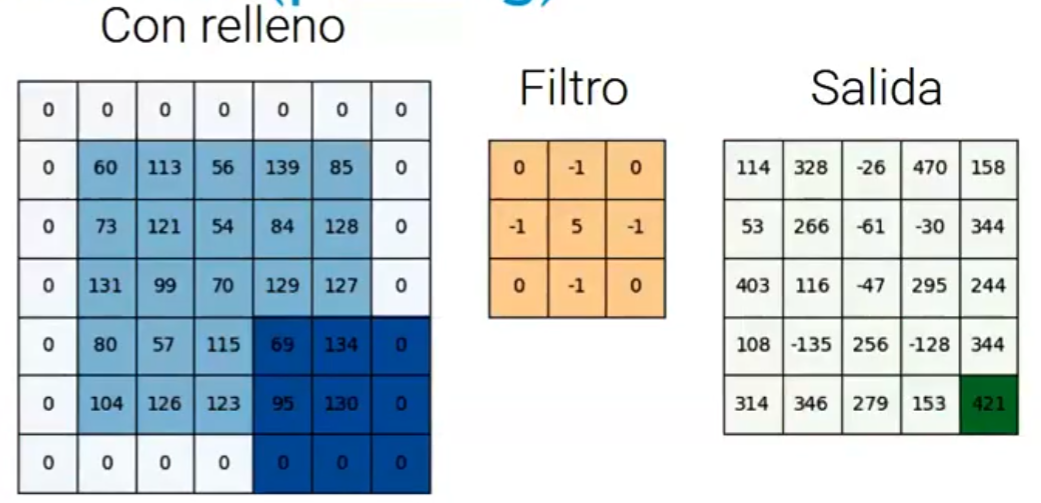

In [15]:
import numpy as np

# Definir la imagen (matriz 5x5)
imagen = np.array([
 [ 60,  113,  56,  139,  85],
 [ 73,  121,  54,  84,  128],
 [131, 99, 70, 129, 127],
 [80, 57, 115, 69, 134],
 [104, 126, 123, 95, 130]
])

# Definir el kernel (filtro 3x3)
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Agregar padding a la imagen (bordes de ceros)
p = 1  # Tamaño del padding
imagen_padded = np.pad(imagen, pad_width=p, mode='constant', constant_values=0)

# Definir tamaños de las matrices
img_size = imagen_padded.shape[0]  # Tamaño de la imagen con padding
kernel_size = kernel.shape[0]       # Tamaño del kernel (asumimos cuadrado)
output_size = img_size - kernel_size + 1  # Tamaño de la salida

# Crear matriz de salida
output = np.zeros((output_size, output_size), dtype=int)

# Aplicar convolución manualmente
for i in range(output_size):
    for j in range(output_size):
        # Extraer la región de la imagen donde se aplica el kernel
        region = imagen_padded[i:i+kernel_size, j:j+kernel_size]
        # Multiplicar elemento a elemento y sumar
        resultado = np.sum(region * kernel)
        # Guardar el resultado en la matriz de salida
        output[i, j] = resultado

# Mostrar resultados
print("Imagen con Padding:")
print(imagen_padded)

print("\nMatriz de salida después de la convolución con padding:")
print(output)

Imagen con Padding:
[[  0   0   0   0   0   0   0]
 [  0  60 113  56 139  85   0]
 [  0  73 121  54  84 128   0]
 [  0 131  99  70 129 127   0]
 [  0  80  57 115  69 134   0]
 [  0 104 126 123  95 130   0]
 [  0   0   0   0   0   0   0]]

Matriz de salida después de la convolución con padding:
[[ 114  328  -26  470  158]
 [  53  266  -61  -30  344]
 [ 403  116  -47  295  244]
 [ 108 -135  256 -128  344]
 [ 314  346  279  153  421]]


In [16]:
import numpy as np

def validate_square_matrix(matrix):
    "Validar si una matriz es cuadrada"
    rows = len(matrix)
    if rows == 0:
        return True
    cols = len(matrix[0])
    return all(len(row) == cols for row in matrix) and rows == cols

def validate_filter_size(n, m):
    "Validar el tamaño del filtro"
    return m <= n and m % 2 != 0

def convolve_valid(matrix, kernel):
    "Convolución sin padding valid"
    n = len(matrix)
    m = len(kernel)
    output_dim = n - m + 1
    output_matrix = np.zeros((output_dim, output_dim))
    for i in range(output_dim):
        for j in range(output_dim):
            region = [row[j:j + m] for row in matrix[i:i + m]]
            output_matrix[i, j] = np.sum(np.array(region) * np.array(kernel))
    return output_matrix

def convolve_same(matrix, kernel):
    "Convolución con padding same"
    n = len(matrix)
    m = len(kernel)
    padding = (m - 1) // 2
    padded_matrix = np.pad(matrix, padding, mode='constant')
    output_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            region = [row[j:j + m] for row in padded_matrix[i:i + m]]
            output_matrix[i, j] = np.sum(np.array(region) * np.array(kernel))
    return output_matrix

if __name__ == "__main__":

    # Ingresar la matriz de entrada
    while True:
        try:
            n = int(input("ingresa la dimensión n de la matriz de entrada (nxn): "))
            if n <= 0:
                print("La dimensión debe ser un entero positivo.")
                continue
            input_matrix_list = []
            print(f"ingrese los elementos de la matriz {n}x{n} fila por fila (separados por espacios):")
            for _ in range(n):
                row_str = input().split()
                if len(row_str) != n:
                    print(f"La fila debe contener {n} elementos. Intente de nuevo.")
                    input_matrix_list = []
                    break
                try:
                    row = [int(x) for x in row_str]
                    input_matrix_list.append(row)
                except ValueError:
                    print("ingrese solo números enteros. Intente de nuevo.")
                    input_matrix_list = []
                    break
            if input_matrix_list:
                input_matrix = np.array(input_matrix_list)
                if validate_square_matrix(input_matrix.tolist()):
                    break
                else:
                    print("La matriz ingresada no es cuadrada. Intente de nuevo.")
        except ValueError:
            print("ingrese un número entero válido para la dimensión.")

    # Ingresar el filtro - kernel
    while True:
        try:
            m = int(input("ingrese la dimensión m del filtro (mxm, debe ser impar y menor o igual a n): "))
            if not validate_filter_size(n, m):
                print(f"El filtro debe ser de tamaño impar y menor o igual a {n}. Intente de nuevo.")
                continue
            kernel_list = []
            print(f"ingrese los elementos del filtro {m}x{m} fila por fila (separados por espacios):")
            for _ in range(m):
                row_str = input().split()
                if len(row_str) != m:
                    print(f"La fila del filtro debe contener {m} elementos. Intente de nuevo.")
                    kernel_list = []
                    break
                try:
                    row = [int(x) for x in row_str]
                    kernel_list.append(row)
                except ValueError:
                    print("ingrese solo números enteros para el filtro. Intente de nuevo.")
                    kernel_list = []
                    break
            if kernel_list:
                kernel = np.array(kernel_list)
                break
        except ValueError:
            print("ingrese un número entero válido para la dimensión del filtro.")

    #convolución sin padding
    convolved_valid_matrix = convolve_valid(input_matrix.tolist(), kernel.tolist())

    #convolución con padding
    convolved_same_matrix = convolve_same(input_matrix.tolist(), kernel.tolist())

    print("\matriz de entrada:")
    print(input_matrix)
    print("\nfiltro - Kernel:")
    print(kernel)
    print("\nmatriz convolucionada sin padding-valid:")
    print(convolved_valid_matrix)
    print("\nmatriz convolucionada con padding-same:")
    print(convolved_same_matrix)

ingresa la dimensión n de la matriz de entrada (nxn): 5
ingrese los elementos de la matriz 5x5 fila por fila (separados por espacios):
1 2 3 4 5
6 7 8 9 10
11 12 13 14 15
16 17 18 19 20
21 22 23 24 25
ingrese la dimensión m del filtro (mxm, debe ser impar y menor o igual a n): 3
ingrese los elementos del filtro 3x3 fila por fila (separados por espacios):
1 0 -1
1 0 -1
1 0 -1
\matriz de entrada:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

filtro - Kernel:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

matriz convolucionada sin padding-valid:
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]

matriz convolucionada con padding-same:
[[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]


# MOMENTO 2

In [1]:
!pip install kaggle
!pip install opencv-python
!pip install tensorflow

In [13]:
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
# 1. Subir el archivo kaggle.json
print("Por favor, sube tu archivo kaggle.json")
uploaded = files.upload()

# 2. Crear el directorio .kaggle si no existe
os.makedirs('/root/.kaggle', exist_ok=True)

# 3. Obtener el nombre real del archivo subido (puede ser 'kaggle (1).json', etc.)
kaggle_file_name = list(uploaded.keys())[0]

# 4. Mover kaggle.json al directorio .kaggle
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded[kaggle_file_name])

# 5. Dar permisos adecuados al archivo
!chmod 600 /root/.kaggle/kaggle.json

# 6. Descargar y descomprimir el dataset desde Kaggle
!pip install -q kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --unzip

# 7. Mostrar los archivos descargados
print("Archivos descargados:")
print(os.listdir())

Por favor, sube tu archivo kaggle.json


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
Archivos descargados:
['.config', 'kaggle.json', 'chest_xray', 'sample_data']



🔍 Entrenando modelo: DenseNet121

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 119s 8s/step - accuracy: 0.5572 - loss: 0.9072 - val_accuracy: 0.7900 - val_loss: 0.4868
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 151s 9s/step - accuracy: 0.7772 - loss: 0.4773 - val_accuracy: 0.9000 - val_loss: 0.3104
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 127s 7s/step - accuracy: 0.8262 - loss: 0.3786 - val_accuracy: 0.9200 - val_loss: 0.2289
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - accuracy: 0.8297 - loss: 0.3515 - val_accuracy: 0.9400 - val_loss: 0.2010
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8672 - loss: 0.2967 - val_accuracy: 0.9500 - val_loss: 0.1829
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 91s 7s/step - accuracy: 0.8435 - loss: 0.3467 - val_accuracy: 0.9400 - val_loss: 0.1805
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 8s/step - accuracy: 0.8899 - loss: 0.2690 - val_accuracy: 0.9400 - val_loss: 0.1866
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.8827 - loss: 

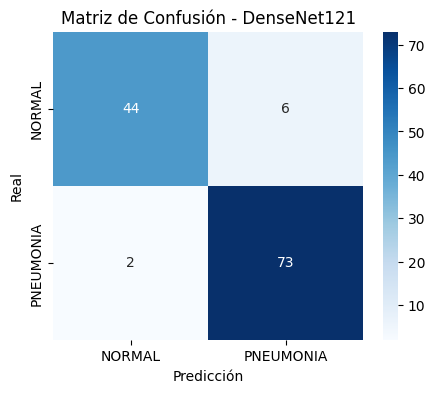


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.88      0.92        50
   PNEUMONIA       0.92      0.97      0.95        75

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125


🎯 Ejemplos visuales para DenseNet121:



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


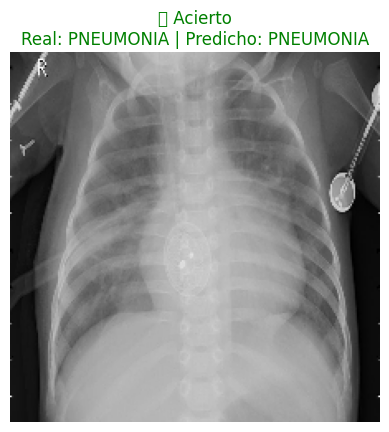

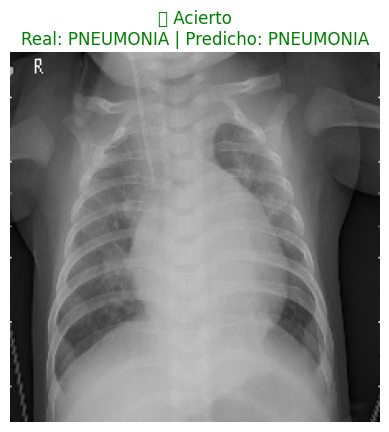

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


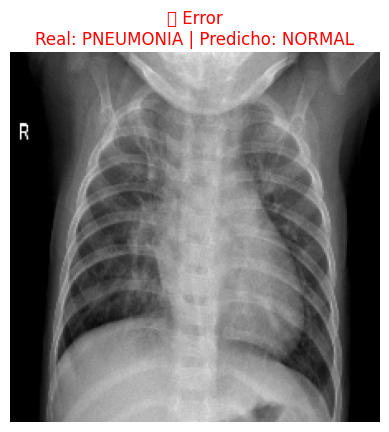

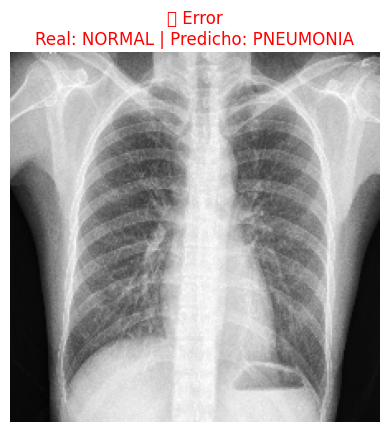


🔍 Entrenando modelo: EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.7002 - loss: 0.5947 - val_accuracy: 0.8900 - val_loss: 0.3145
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8393 - loss: 0.3659 - val_accuracy: 0.8900 - val_loss: 0.2284
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8367 - loss: 0.3431 - val_accuracy: 0.8600 - val_loss: 0.2762
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8641 - loss: 0.3000 - val_accuracy: 0.9100 - val_loss: 0.1968
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9059 - loss: 0.2606 - val_accuracy: 0.8900 - val_loss: 0.1917
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8927 - loss: 0.2427 - val_accuracy: 0.9200 - val_loss: 0.2090
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9230 - loss: 0.2311 - val_accuracy: 0.9600 - val_loss: 0.1681
Epoch 8/10
13/13 ━━━━━━━━━━━━

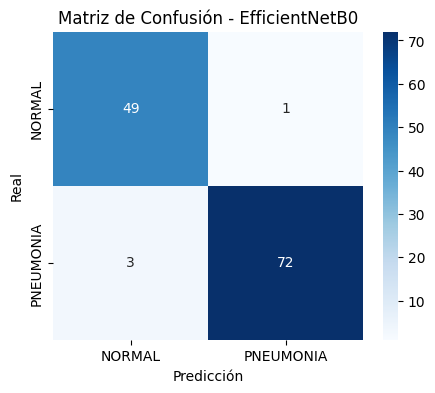


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96        50
   PNEUMONIA       0.99      0.96      0.97        75

    accuracy                           0.97       125
   macro avg       0.96      0.97      0.97       125
weighted avg       0.97      0.97      0.97       125


🎯 Ejemplos visuales para EfficientNetB0:



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


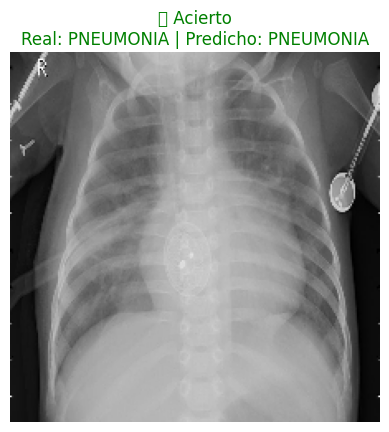

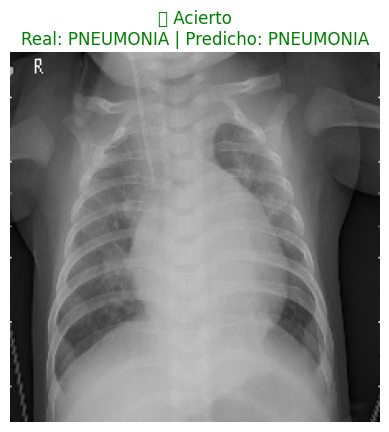

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


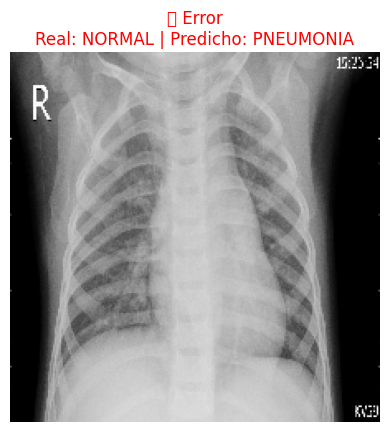

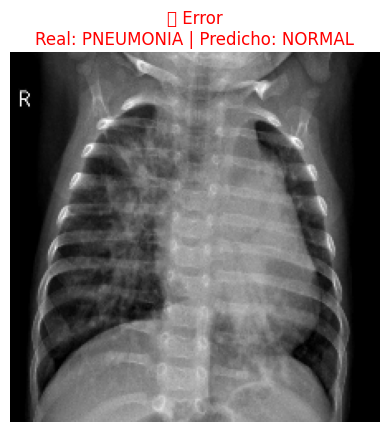


🔍 Entrenando modelo: ResNet50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 106s 8s/step - accuracy: 0.5896 - loss: 0.9072 - val_accuracy: 0.7500 - val_loss: 0.4515
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.7780 - loss: 0.4993 - val_accuracy: 0.8200 - val_loss: 0.3362
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 7s/step - accuracy: 0.8503 - loss: 0.3759 - val_accuracy: 0.8800 - val_loss: 0.2611
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.8629 - loss: 0.3208 - val_accuracy: 0.9100 - val_loss: 0.2290
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8990 - loss: 0.2599 - val_accuracy: 0.9000 - val_loss: 0.2185
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.8824 - loss: 0.2791 - val_accuracy: 0.9200 - val_loss: 0.2077
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8540 - loss: 0.3928 - val_accuracy: 0.9100 - val_loss: 0.2058
Epoch 8/10
13/13 ━━━━━━━━━━━━

3/4 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step


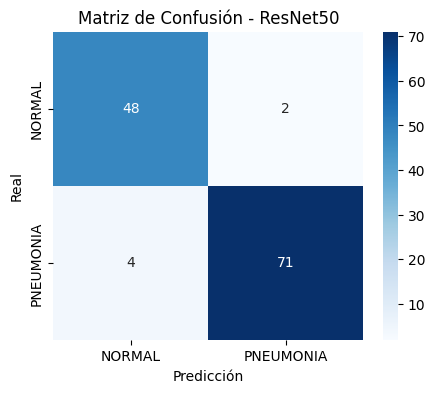


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.96      0.94        50
   PNEUMONIA       0.97      0.95      0.96        75

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125


🎯 Ejemplos visuales para ResNet50:



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


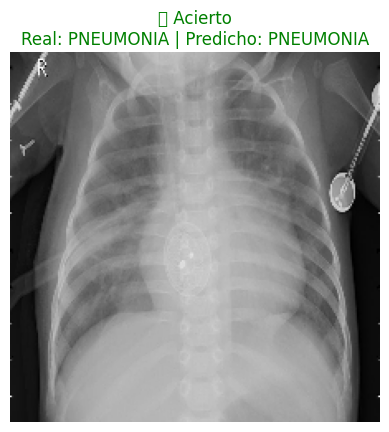

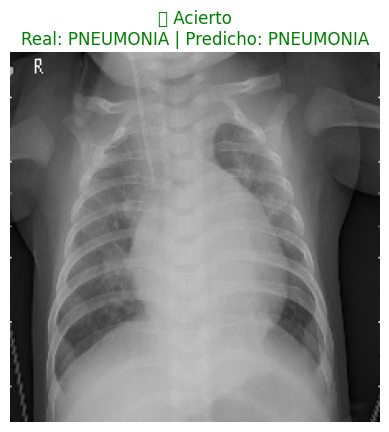

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


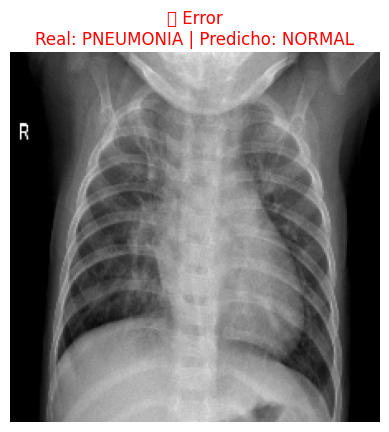

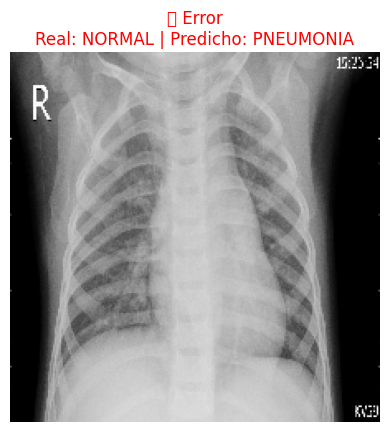

In [7]:
# diccionario para los modelos y su preprocesamiento
model_dict = {
    'ResNet50': (ResNet50, tf.keras.applications.resnet.preprocess_input),
    'DenseNet121': (DenseNet121, tf.keras.applications.densenet.preprocess_input),
    'EfficientNetB0': (EfficientNetB0, tf.keras.applications.efficientnet.preprocess_input)
}

# funciónm previamente creada para cargar los datos
def get_data(folder, Size_Image):
    X, Y = [], []
    label = 0

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type == "NORMAL":
                label = 0
            elif wbc_type == "PNEUMONIA":
                label = 1

            for Image_fileName in os.listdir(os.path.join(folder, wbc_type)):
                img_file = cv2.imread(os.path.join(folder, wbc_type, Image_fileName))
                if img_file is not None:
                    img_file = cv2.resize(img_file, (Size_Image, Size_Image), interpolation=cv2.INTER_CUBIC)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    Y.append(label)

    return np.array(X), np.array(Y)

# ruta y tamaño de las imágenes
path_image = "/content/chest_xray/test"
Size_Image = 224
X_Image, Y_Image = get_data(path_image, Size_Image)

# división de los datos (solo de la carpeta test) y codificación
X_train, X_test, Y_train, Y_test = train_test_split(X_Image, Y_Image, test_size=0.2, random_state=32)
Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)

# función para construir el modelo
def build_model(base_model_fn, input_shape, num_classes, use_extra_dense=False):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)

    if use_extra_dense:
        x = Dense(128, activation='relu')(x)
        x = Dense(64, activation='relu')(x)

    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# diccionario para guardar métricas
metric_results = {}

# entrenamiento y evaluación
def train_and_evaluate_model(model_name, input_shape=(224, 224, 3), use_extra_dense=False):
    print(f"\n🔍 Entrenando modelo: {model_name}\n")
    base_model_fn, preprocess_input_fn = model_dict[model_name]

    X_train_pre = preprocess_input_fn(X_train)
    X_test_pre = preprocess_input_fn(X_test)

    model = build_model(base_model_fn, input_shape, num_classes=2, use_extra_dense=use_extra_dense)
    model.fit(X_train_pre, Y_train, validation_split=0.2, epochs=10, batch_size=32)

    # evaluación
    scores = model.evaluate(X_test_pre, Y_test, verbose=0)
    print(f"\n✅ Test accuracy: {scores[1]:.4f}")

    y_true = np.argmax(Y_test, axis=1)
    y_pred_probs = model.predict(X_test_pre)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["NORMAL", "PNEUMONIA"], yticklabels=["NORMAL", "PNEUMONIA"])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

    acc = scores[1]
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_results[model_name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }


    # muestras-ejemplos de aciertos y errores
    print(f"\nEjemplos visuales para {model_name}:\n")

    correct_idx = np.where(y_true == y_pred)[0]
    incorrect_idx = np.where(y_true != y_pred)[0]

    def show_images(indices, title, color):
        for i in indices[:2]:
            plt.figure()
            plt.imshow(X_test[i].astype('uint8'))
            plt.title(f"{title}\nReal: {'NORMAL' if y_true[i]==0 else 'PNEUMONIA'} | Predicho: {'NORMAL' if y_pred[i]==0 else 'PNEUMONIA'}", color=color)
            plt.axis('off')
            plt.show()

    show_images(correct_idx, "Acierto", 'green')
    show_images(incorrect_idx, "Error", 'red')


# ejecución de los modelos seleccionados
for model_name in ['DenseNet121', 'EfficientNetB0', 'ResNet50']:
    use_extra_dense = model_name in ['DenseNet121', 'EfficientNetB0']
    train_and_evaluate_model(model_name, use_extra_dense=use_extra_dense)


In [17]:
# convertir el diccionario de las métricas a DataFrame
metrics_df = pd.DataFrame(metric_results).T.reset_index().rename(columns={'index': 'Modelo'})

# reformateamos el df para poder generar el gráfico interactivo usando plotly
metrics_melted = metrics_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

fig = px.bar(
    metrics_melted,
    x='Modelo',
    y='Valor',
    color='Métrica',
    barmode='group',
    title='Comparación de métricas por modelo',
    height=500
)

fig.update_layout(
    xaxis_title='Modelo',
    yaxis_title='Valor',
    yaxis=dict(range=[0, 1]),
    legend_title_text='Métrica'
)

fig.show()

## Análisis de resultados
**DenseNet121**

El modelo DenseNet121 mostró una evolución muy consistente a lo largo de las 10 épocas, este modelo comenzó con una precisión de entrenamiento del 55.7% y logró alcanzar un accuracy final en test de 93.6%, lo cual es un resultado bastante bueno. Las métricas de clasificación indican un buen desempeño balanceado con una precisión de 0.96 para NORMAL y 0.92 para PNEUMONIA, con un F1-score global de 0.94. La matriz de confusión refleja una leve confusión entre ambas clases, especialmente en el caso de NORMAL, donde se identificaron erróneamente algunos casos como PNEUMONIA. Sin embargo, el modelo logró estabilizar su validación temprano (alrededor de la época 4), lo cual es una buena señal de generalización. DenseNet mostró ser robusto, pero no fue el mejor en rendimiento final.

**EfficientNetB0**

En este ejercicio EfficientNetB0 fue el modelo con mejor desempeño, alcanzando una precisión de 96.8% en el conjunto de test. Este modelo mostró una crecimiento de entrenamiento eficiente, alcanzando rápidamente altos valores de precisión desde la segunda época. En cuanto a las métricas, obtuvo una precisión de 0.99 en la clase PNEUMONIA y 0.94 en la clase NORMAL, con un F1-score general de 0.97. La matriz de confusión muestra muy pocas clasificaciones incorrectas, lo que indica una gran capacidad para diferenciar entre las clases. Además, fue el modelo más rápido en entrenar por época, lo que lo convierte en una opción ideal para tareas con recursos limitados o necesidad de despliegue rápido, por lo que EfficientNetB0 demuestra claramente la eficiencia y potencia del uso del Transfer Learning.

**ResNet50**

ResNet50 también alcanzó un desempeño alto, con una precisión en test de 95.2%. Aunque tuvo un inicio más lento en comparación con EfficientNet, mostró una curva de aprendizaje estable y consistente, superando el 90% de validación en la época 4. Las métricas de clasificación muestran un excelente equilibrio: 0.99 de precisión para PNEUMONIA y 0.94 para NORMAL, con F1-scores respectivos de 0.97 y 0.96. La matriz de confusión indica solo unos pocos errores, con una ligera tendencia a clasificar erróneamente algunos casos NORMAL como PNEUMONIA. En términos de tiempo, fue más lento que EfficientNet pero similar a DenseNet, asi que ResNet50 es un modelo confiable y con buena capacidad de generalización.



## 1. Comparación de Modelos
### ¿Cuál modelo obtuvo mejor precisión y por qué?
El modelo EfficientNetB0 obtuvo la mejor precisión con un 96.8% en el conjunto de prueba. Esto podría atribuirse a su arquitectura optimizada, que utiliza menos parámetros y mayor eficiencia en la extracción de características, permitiendo un mejor aprendizaje con menos sobreajuste. También logró mantener un excelente balance entre precisión y recall, lo cual es clave en aplicaciones médicas

### ¿Cuánto tiempo de entrenamiento tomó cada modelo?

* DenseNet121: Entre 90s y 15.s por época (más o menos unos 20 min en total).
* EfficientNetB0: Entre 40s y 83s por época (más o menos unos 11 min en total).
* ResNet50: Entre 94s y 144s por época (más o menos unos 20 min en total).

EfficientNetB0 fue el más rápido y además el más preciso.

## 2. Conclusiones
### ¿El dataset elegido influenció el desempeño de los modelos?
Sí, el dataset de [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data) tiene una gran influencia. En este caso, la calidad de las imágenes y el balance de clases permitió que los modelos entrenados mediante Transfer Learning alcanzaran altos niveles de precisión. Sin embargo, pequeñas diferencias en recall y precisión reflejan que algunos modelos son más sensibles a la distribución y características de los datos. Además el tamaño del dataset facilitó la implementación y ejecución del ejercicio.

### ¿Qué ventajas ofrece Transfer Learning frente a entrenar una red desde cero?
El Transfer Learning permite aprovechar el conocimiento aprendido en grandes datasets (como ImageNet) para tareas similares, lo que reduce significativamente el tiempo de entrenamiento y mejora la precisión, especialmente cuando se cuenta con una cantidad moderada o limitada de datos. Entrenar desde cero sería más costoso computacionalmente y requeriría una cantidad mucho mayor de datos para evitar el sobreajuste.

### ¿Cómo podrían mejorarse los resultados con ajustes adicionales?
Los resultados pueden mejorarse ajustando varios aspectos como:

* Aplicar aumentos de datos (data augmentation) más agresivos para mejorar la generalización
* Ajustar la tasa de aprendizaje y otras variables del optimizador y jugar con los hiperparámetros
* Aplicar técnicas de fine-tuning desbloqueando más capas del modelo base
* Usar técnicas de regularización como Dropout o BatchNormalization más agresivas
* Realizar una búsqueda de hiperparámetros (GridSearch o RandomSearch)

*NOTA: es importante mencionar que para efectos del experimento solo trabajamos con los datos de la carpeta test podríamos seguir probando los modelos con el resto de imágenes del dataset*
